In [170]:
#ignorando los warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Importando las librerias

In [171]:
import pandas as pd
import numpy as np
import seaborn as sns

from math import sqrt
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression


## 2. Leyendo los datos

In [172]:
dataset = pd.read_csv('..\datos_procesados\datos_procesados.csv')
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42,3,75075.31,2,1,0,92888.52,1


## 3. Separando los datos en las variables predictoras (X) y la variable a predecir (y)

In [173]:
X = dataset.drop(columns=['Exited'], axis=1)
y = dataset['Exited']

## 4. Realizando el escalamiento robusto de las variables predictoras

In [174]:
esc_rob = RobustScaler()
X_esc = esc_rob.fit_transform(X=X)

## 5. Separando los datos en train y test

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X_esc, y, test_size=0.3, random_state=42)

## 6. Regresión logística

#### 6.1. Creando el algoritmo y entrenandolo 

In [176]:
rg = LogisticRegression()
rg.fit(X=X_train, y=y_train)

LogisticRegression()

#### 6.2. Evaluando las predicciones del modelo con los datos de entrenamiento

Presición del modelo: 80.93 %


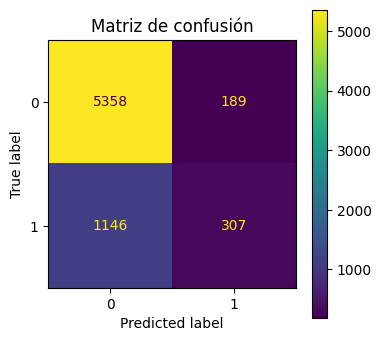

In [177]:
y_pred = rg.predict(X=X_train)
print('Presición del modelo: {:.2f} %'.format(accuracy_score(y_true=y_train, y_pred=y_pred)*100))

matrix_conf = confusion_matrix(y_true=y_train, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
display = ConfusionMatrixDisplay(matrix_conf)
ax.set(title='Matriz de confusión')
display.plot(ax=ax)
plt.show()

#### 6.3. Evaluando las predicciones del modelo con los datos de test

Presición del modelo: 81.73 %


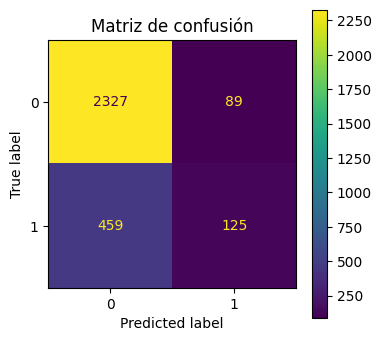

In [178]:
y_pred = rg.predict(X=X_test)
print('Presición del modelo: {:.2f} %'.format(accuracy_score(y_true=y_test, y_pred=y_pred)*100))

matrix_conf = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
display = ConfusionMatrixDisplay(matrix_conf)
ax.set(title='Matriz de confusión')
display.plot(ax=ax)
plt.show()

Se puede observar que la presición en la predición tanto con los datos de entrenamiento cómo con los datos de prueba, son muy similares

## 7. Optimización paramétrica

In [179]:
#Creando la grilla de parámetros
parametros = {
    'penalty':['l1','l2','elasticnet'],
    'C':np.linspace(0.1,2,100)
}

#Se crea el optimizador
rand_est = RandomizedSearchCV(
    estimator=LogisticRegression(), 
    param_distributions=parametros, 
    n_iter=10, 
    cv=3, 
    scoring='accuracy'
)

#Entrenando el modelo por optimización
rand_est.fit(X=X_train, y=y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions={'C': array([0.1       , 0.11919192, 0.13838384, 0.15757576, 0.17676768,
       0.1959596 , 0.21515152, 0.23434343, 0.25353535, 0.27272727,
       0.29191919, 0.31111111, 0.33030303, 0.34949495, 0.36868687,
       0.38787879, 0.40707071, 0.42626263, 0.44545455, 0.46464646,
       0.48383838, 0.5030303 , 0.52222222, 0.54141414, 0.560606...
       1.44343434, 1.46262626, 1.48181818, 1.5010101 , 1.52020202,
       1.53939394, 1.55858586, 1.57777778, 1.5969697 , 1.61616162,
       1.63535354, 1.65454545, 1.67373737, 1.69292929, 1.71212121,
       1.73131313, 1.75050505, 1.76969697, 1.78888889, 1.80808081,
       1.82727273, 1.84646465, 1.86565657, 1.88484848, 1.9040404 ,
       1.92323232, 1.94242424, 1.96161616, 1.98080808, 2.        ]),
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   scoring='accuracy')

#### 7.1. Evaluando las predicciones del nuevo modelo con los datos de entrenamiento

Presición del modelo: 80.90 %


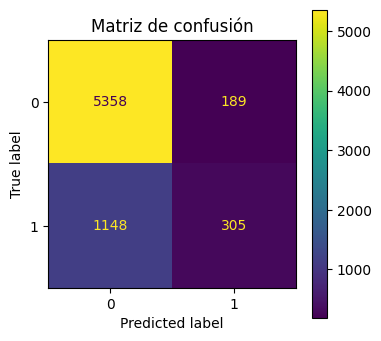

In [180]:
y_pred = rand_est.predict(X=X_train)
print('Presición del modelo: {:.2f} %'.format(accuracy_score(y_true=y_train, y_pred=y_pred)*100))

matrix_conf = confusion_matrix(y_true=y_train, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
display = ConfusionMatrixDisplay(matrix_conf)
ax.set(title='Matriz de confusión')
display.plot(ax=ax)
plt.show()

#### 7.2. Evaluando las predicciones del nuevo modelo con los datos de prueba

Presición del modelo: 81.73 %


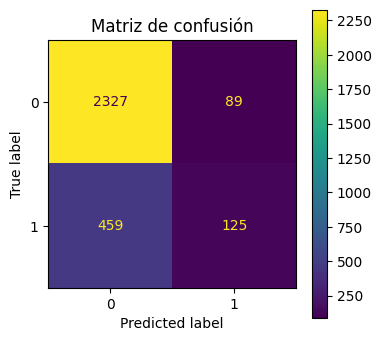

In [181]:
y_pred = rand_est.predict(X=X_test)
print('Presición del modelo: {:.2f} %'.format(accuracy_score(y_true=y_test, y_pred=y_pred)*100))

matrix_conf = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
display = ConfusionMatrixDisplay(matrix_conf)
ax.set(title='Matriz de confusión')
display.plot(ax=ax)
plt.show()

No se obtuvo una mejora considerable implementando el RandomizedSearchCV frente a la regresión logística 